# Convultional Neural Network - Cat vs Dog Challenge

Unsurprisingly, the cats vs. dogs Kaggle competition in 2013 was won by entrants who used convnets. The best entries could achieve up to 
95% accuracy. In our own example, we will get fairly close to this accuracy (in the next section), even though we will be training our 
models on less than 10% of the data that was available to the competitors.
This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543MB large (compressed). After downloading 
and uncompressing it, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation 
set with 500 samples of each class, and finally a test set with 500 samples of each class.

## ` Loading data from kaggle`
Make sure to upload kaggle.json first and also accept the rules of the competition in kaggle if data set belongs to a competition.

In [ ]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download dogs-vs-cats -f train.zip

 99% 539M/543M [00:04<00:00, 150MB/s]
100% 543M/543M [00:04<00:00, 137MB/s]


In [ ]:
!unzip train.zip

## `Importing Libraries`

In [36]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPool2D , Dropout , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os, shutil

## ` Setting and distributing pictures to appropriate directories`

In [8]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/content/train'

In [9]:
# The directory where we will store our smaller dataset
base_dir = '/content/catVsdog'
os.mkdir(base_dir)

In [10]:
# Directories for training, validation and test datasets
train_dir = os.path.join(base_dir , 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir , 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir , 'test')
os.mkdir(test_dir)

In [11]:
# Directories for cat and dog pictures in each of the train, validation and test folder

train_cats_dir = os.path.join(train_dir , 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir , 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir , 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir , 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir , 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir , 'dogs')
os.mkdir(test_dogs_dir)

In [12]:
# Copying 2000 cat images from original directory to the train cat folder
fnames = [f'cat.{i}.jpg' for i in range(0 , 4000 , 2)]
for fname in fnames:
    src = os.path.join(original_dataset_dir , fname)
    dst = os.path.join(train_cats_dir , fname)
    shutil.copyfile(src , dst)

In [13]:
# Copying next 1000 cat images to validation_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(4000, 5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
# Copying next 1000 cat images to test_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(5000, 6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
# Copying 2000 dog images from original directory to the train dog folder
fnames = [f'dog.{i}.jpg' for i in range(0,4000,2)]
for fname in fnames:
    src = os.path.join(original_dataset_dir , fname)
    dst = os.path.join(train_dogs_dir , fname)
    shutil.copyfile(src , dst)

In [16]:
# Copying 1000 dog images to the validation dog folder
fnames = [f'dog.{i}.jpg' for i in range(4000,5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir , fname)
    dst = os.path.join(validation_dogs_dir , fname)
    shutil.copyfile(src , dst)

In [17]:
# Copying 1000 dog images to the test dog folder
fnames = [f'dog.{i}.jpg' for i in range(5000,6000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir , fname)
    dst = os.path.join(test_dogs_dir , fname)
    shutil.copyfile(src , dst)

## `Validating number of images in each directory`


In [18]:
print('Training folder : ')
print('Total training cat images : ' , len(os.listdir(train_cats_dir)))
print('Total training dog images : ' , len(os.listdir(train_dogs_dir)))
print(' ')
print('validation folder : ')
print('Total validation cat images : ' , len(os.listdir(validation_cats_dir)))
print('Total validation dog images : ' , len(os.listdir(validation_dogs_dir)))
print(' ')
print('test folder : ')
print('Total test cat images : ' , len(os.listdir(test_cats_dir)))
print('Total test dog images : ' , len(os.listdir(test_dogs_dir)))

Training folder : 
Total training cat images :  2000
Total training dog images :  2000
 
validation folder : 
Total validation cat images :  1000
Total validation dog images :  1000
 
test folder : 
Total test cat images :  1000
Total test dog images :  1000


# Model Architecture

Since we are attacking a binary classification problem, we are ending the network with a single unit (a `Dense` layer of size 1) and a 
`sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

## `Building and compiling model`

In [19]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation='relu' , input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128 , (3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128 , (3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

For our compilation step, we'll go with the `RMSprop` optimizer as usual. Since we ended our network with a single sigmoid unit, we will 
use binary crossentropy as our loss (as a reminder, check out the table in Chapter 4, section 5 for a cheatsheet on what loss function to 
use in various situations).

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

## Data Preprocessing

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image 
processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to 
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we 
will use here.

Links to keras documentation : 
`https://keras.io/preprocessing/image/`

In [22]:
# Train Data

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # Target directory
    train_dir,
    # Resizing images
    target_size = (150,150),
    batch_size = 20,
    # For binary labels
    class_mode = 'binary'
)

Found 4000 images belonging to 2 classes.


In [23]:
# Validation Data

# All images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    # Target directory
    validation_dir,
    # Resizing images
    target_size = (150,150),
    batch_size = 20,
    # For binary labels
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [32]:
# Test Data

# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    # Target directory
    test_dir,
    # Resizing images
    target_size = (150,150),
    batch_size = 20,
    # For binary labels
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary 
labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches 
indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop 
at some point.

In [24]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [25]:
for data_batch , label_batch in train_generator:
    print(data_batch[0].shape)
    print(labels_batch[0])
    break

(150, 150, 3)
0.0


0.0


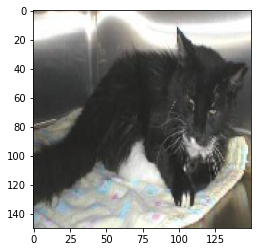

In [26]:
for data_batch , label_batch in validation_generator:
    plt.imshow(data_batch[0])
    print(labels_batch[0])
    break

## ` Training the model`

Let's fit our model to the data using the generator. We do it using the `fit_generator` method, the equivalent of `fit` for data generators 
like ours. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 
Because the data is being generated endlessly, the generator needs to know example how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take 200 batches until we see our target of 4000 samples.

When using `fit_generator`, one may pass a `validation_data` argument, much like with the `fit` method. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=20,
    validation_data = validation_generator,
    validation_steps = 100
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
200/200 [==============================] - 34s 118ms/step - loss: 0.6856 - accuracy: 0.5460 - val_loss: 0.6576 - val_accuracy: 0.6185
Epoch 2/20
200/200 [==============================] - 24s 118ms/step - loss: 0.6475 - accuracy: 0.6208 - val_loss: 0.6138 - val_accuracy: 0.6835
Epoch 3/20
200/200 [==============================] - 23s 114ms/step - loss: 0.5972 - accuracy: 0.6805 - val_loss: 0.5768 - val_accuracy: 0.6960
Epoch 4/20
200/200 [==============================] - 23s 116ms/step - loss: 0.5551 - accuracy: 0.7097 - val_loss: 0.5393 - val_accuracy: 0.7265
Epoch 5/20
200/200 [==============================] - 22s 112ms/step - loss: 0.5234 - accuracy: 0.7343 - val_loss: 0.5140 - val_accuracy: 0.7515
Epoch 6/20
200/200 [==============================] - 23s 114ms/step - loss: 0.4876 - accuracy: 0.7640 - val_loss: 0.5022 - val_accuracy: 0.7665
Epoch 7/20
200/200 [==============================] - 22s 112ms/step - loss: 0.4662 - accuracy: 0.7780 - val_loss: 0.4925 - val_ac

## ` Visualizing the model`
Let's plot the loss and accuracy of the model over the training and validation data during training:

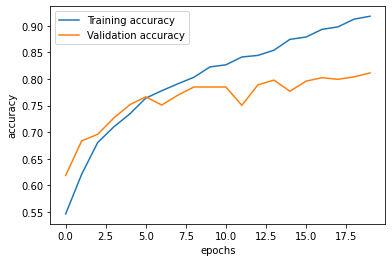

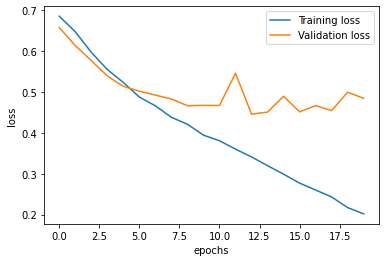

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(1)
plt.plot(epochs , acc , label='Training accuracy')
plt.plot(epochs , val_acc , label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(epochs , loss , label='Training loss')
plt.plot(epochs , val_loss , label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our 
validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss 
keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern.
Let's train our network using data augmentation and dropout:

## `Evaluatin with test data`

In [33]:
loss , acc = model.evaluate(test_generator)
print(f'Test Accuracy : {acc:.2f} , Test Loss : {loss:.2f}')

100/100 [==============================] - 7s 70ms/step - loss: 0.4850 - accuracy: 0.8040
Test Accuracy : 0.80 , Test Loss : 0.48


# Data Augmentation
Using data augmentation to lower the chance of model getting overfitted.

## `Data Augmentation with Keras`

In [59]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures 
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Let's take a look at our augmented images:

## ` Using image class from keras.preprocessing to show images`
We create a data generator to generate randomly augmented images based on either a directory or a single image. Since this data generator generate images indefinitly we need to use a break to end it's process. Also augmenting images required them to be in the form of numpy array hence the use of `img_to_array`.

Shape before reshaping : (150, 150, 3)
Shape after reshaping : (1, 150, 150, 3)


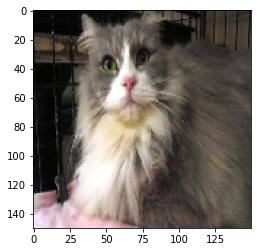

In [55]:
fnames = [os.path.join(train_cats_dir , fname) for fname in os.listdir(train_cats_dir)]

# range between 0-1999 based on how many images you choosed
img_path = fnames[1999]
img = image.load_img(img_path , target_size=(150,150))
plt.imshow(img)

# Image to array for augmenting the image
x = image.img_to_array(img)
print(f'Shape before reshaping : {x.shape}')
x = x.reshape((1,) + x.shape)
print(f'Shape after reshaping : {x.shape}')

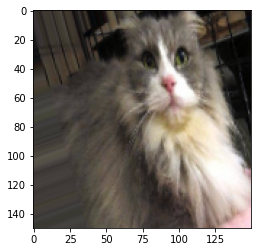

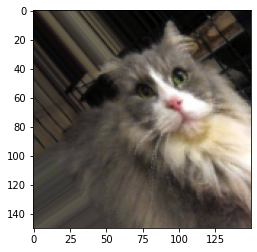

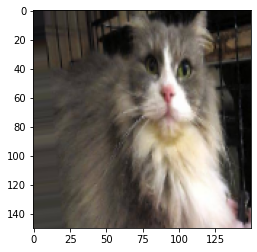

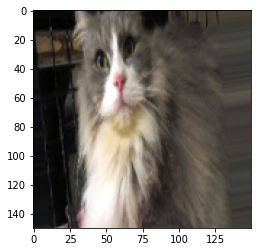

In [56]:
# Now we can use this image to create variation of it using our datagen we created above
# Make sure to add a break statement, otherwise loop will continue on forever

i = 0
for batch in datagen.flow(x , batch_size=1):

    plt.figure(i)
    img = image.array_to_img(batch[0])
    plt.imshow(img)
    i += 1
    if i == 4:
        break

## ` Training a new model with augmented data`
If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting.

In [58]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , activation='relu' , input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64 , (3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128 , (3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128 , (3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(512 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation='sigmoid'))

model.summary()

model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

## `New train data generator`
Now that we have a random image generator for augmenting our original images, we should use this generator to create train data generator. Also remember that validation and test data generator are unchaged and should not be augmeneted.

In [60]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.


## `Training the new model`

In [61]:
history = model.fit(
    train_generator,
    steps_per_epoch = 200,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 100,
)

Epoch 1/30
200/200 [==============================] - 43s 212ms/step - loss: 0.6900 - accuracy: 0.5213 - val_loss: 0.6789 - val_accuracy: 0.5335
Epoch 2/30
200/200 [==============================] - 42s 211ms/step - loss: 0.6679 - accuracy: 0.5890 - val_loss: 0.6576 - val_accuracy: 0.5980
Epoch 3/30
200/200 [==============================] - 42s 208ms/step - loss: 0.6443 - accuracy: 0.6230 - val_loss: 0.6413 - val_accuracy: 0.6015
Epoch 4/30
200/200 [==============================] - 42s 210ms/step - loss: 0.6217 - accuracy: 0.6495 - val_loss: 0.5825 - val_accuracy: 0.7060
Epoch 5/30
200/200 [==============================] - 42s 209ms/step - loss: 0.6063 - accuracy: 0.6637 - val_loss: 0.5847 - val_accuracy: 0.6935
Epoch 6/30
200/200 [==============================] - 42s 208ms/step - loss: 0.5988 - accuracy: 0.6817 - val_loss: 0.5928 - val_accuracy: 0.6700
Epoch 7/30
200/200 [==============================] - 42s 210ms/step - loss: 0.5806 - accuracy: 0.6963 - val_loss: 0.5595 - val_ac

## `Visualizing the model`

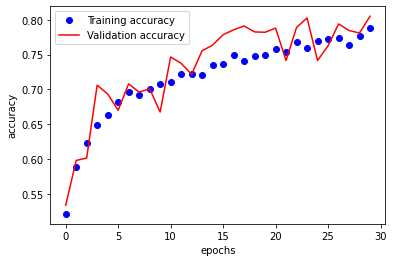

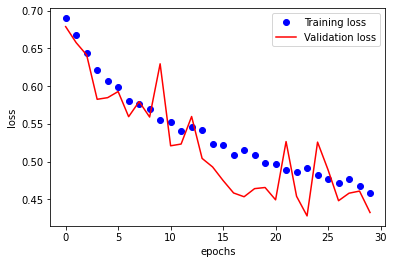

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc , 'bo' , label='Training accuracy')
plt.plot(val_acc , 'r' , label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(loss , 'bo' , label='Training loss')
plt.plot(val_loss , 'r' , label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## ` Evaluation with test dataset`

In [63]:
loss , acc = model.evaluate(test_generator)
print(f'Test accuracy : {acc:.2f} , Test loss : {loss:.2f}')

100/100 [==============================] - 7s 68ms/step - loss: 0.4445 - accuracy: 0.7925
Test accuracy : 0.79 , Test loss : 0.44


## ` Saving the model`

In [64]:
model.save('cats_and_dogs_small_1.h5')